In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import IPython
import scipy

from PIL import Image

# Part 1: binary images

In [2]:
def display_image(img_array, title="", vmin=0, vmax=1):
    plt.imshow(1 - img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.clim(1 - vmax, 1 - vmin)
    plt.show()
    
def display_image255(img_array, title="", vmin=0, vmax=1):
    plt.imshow(255 - img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.clim(255 - vmax, 255 - vmin)
    plt.show()

def multiply_struct_elem(B, n):
    R = np.array([[1]], np.uint8)
    for _ in range(n):
        R = cv.dilate(add_border(R, 1), B)
    return R

def opening(X, B):
    return cv.dilate(cv.erode(X, B), B)

def closure(X, B):
    return cv.erode(cv.dilate(X, B), B)

def add_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = np.zeros((rows + n * 2, cols + n * 2), dtype=matrix.dtype)
    new_matrix[n:rows + n, n:cols + n] = matrix
    return new_matrix

def remove_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = matrix[n:rows - n, n:cols - n]
    return new_matrix

def PS(X, n, B):
    if n >= 0:
        first = opening(X, multiply_struct_elem(B, n))
        second = opening(X, multiply_struct_elem(B, n + 1))
        return sum(sum(cv.bitwise_and(first, 1 - second)))
    else:
        first = closure(X, multiply_struct_elem(B, -n))
        second = closure(X, multiply_struct_elem(B, -n - 1))
        return sum(sum(cv.bitwise_and(first, 1 - second)))

## Initial binary image

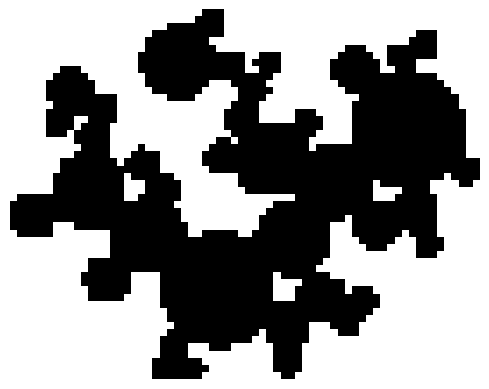

In [3]:
filename = 'circles'
binary_image = cv.imread(f'{filename}.jpg', cv.IMREAD_GRAYSCALE)
binary_image = cv.threshold(binary_image, 232, 255, cv.THRESH_BINARY_INV)[1] / 255
# display_image(binary_image, 'circles')

def resize_grayscale_image(image, scale_factor):
    image = image.astype(np.uint8)
    smaller_image = cv.resize(image, None, fx=1/scale_factor, fy=1/scale_factor, interpolation=cv.INTER_AREA)
    return smaller_image

img_array = binary_image
scaled_image = resize_grayscale_image(img_array, scale_factor=4)
display_image(scaled_image)
binary_image = scaled_image

## Setting structuring element

In [4]:
B = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]], np.uint8)

## Morphological spectre

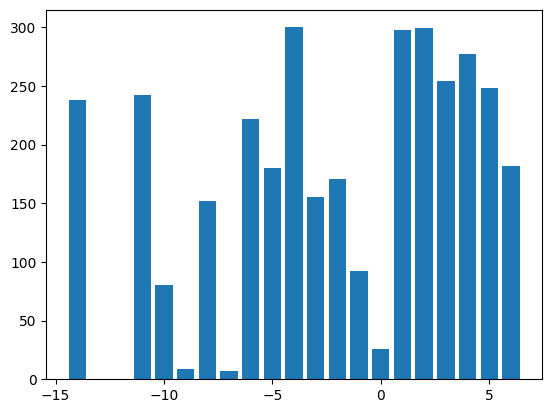

In [5]:
def non_zero_slice(my_dict):
    keys = list(my_dict.keys())
    first_non_zero = next(key for key in keys if my_dict[key] != 0)
    last_non_zero = next(key for key in reversed(keys) if my_dict[key] != 0)
    result_slice = {key: my_dict[key] for key in range(first_non_zero, last_non_zero + 1)}
    return result_slice

set = {}

for n in range(-127, 128):
    set[n] = PS(binary_image, n, B)
    
set = non_zero_slice(set)
plt.bar(set.keys(), set.values())
plt.show()

# Part 2: grayscale images

In [6]:
def display_image(img_array, title="", vmin=0, vmax=1):
    plt.imshow(1 - img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.clim(1 - vmax, 1 - vmin)
    plt.show()
    
def display_image255(img_array, title="", vmin=0, vmax=255):
    plt.imshow(255 - img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.clim(255 - vmax, 255 - vmin)
    plt.show()
    
def resize_grayscale_image(image, scale_factor):
    image = image.astype(np.uint8)
    smaller_image = cv.resize(image, None, fx=1/scale_factor, fy=1/scale_factor, interpolation=cv.INTER_AREA)
    return smaller_image

def multiply_struct_elem(B, n):
    if n == 0:
        raise ValueError
    R = B.copy()
    for _ in range(n - 1):
        R = scipy.ndimage.grey_dilation(add_border(R, 1), structure=B)
    return R

def add_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = np.zeros((rows + n * 2, cols + n * 2), dtype=matrix.dtype)
    new_matrix[n:rows + n, n:cols + n] = matrix
    return new_matrix

def remove_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = matrix[n:rows - n, n:cols - n]
    return new_matrix

def PS(X, n, B):
    if n > 0:
        first = scipy.ndimage.grey_opening(X, structure=multiply_struct_elem(B, n))
        second = scipy.ndimage.grey_opening(X, structure=multiply_struct_elem(B, n + 1))
        return sum(sum(first - second))
    elif n == 0:
        first = X
        second = scipy.ndimage.grey_opening(X, structure=B)
        return sum(sum(first - second))
    elif n == -1:
        first = scipy.ndimage.grey_closing(X, structure=B)
        second = X
        return sum(sum(first - second))
    elif n < -1:
        first = scipy.ndimage.grey_closing(X, structure=multiply_struct_elem(B, -n))
        second = scipy.ndimage.grey_closing(X, structure=multiply_struct_elem(B, -n - 1))
        return sum(sum(first - second))

# Initial grayscale image

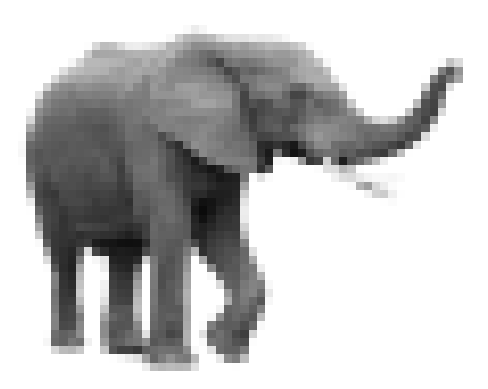

In [7]:
filename = 'elephant'
binary_image = 255 - cv.imread(f'{filename}.jpg', cv.IMREAD_GRAYSCALE)
# display_image255(binary_image, 'elephant')
img_array = binary_image
scaled_image = resize_grayscale_image(img_array, scale_factor=8)
display_image255(scaled_image)

## Setting structuring element

In [8]:
B = np.array([
    [20, 30, 20],
    [30, 40, 30],
    [20, 30, 20]])

## Morphological spectre

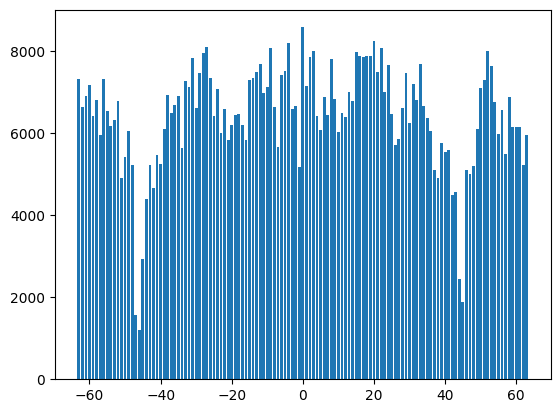

In [9]:
def non_zero_slice(my_dict):
    keys = list(my_dict.keys())
    first_non_zero = next(key for key in keys if my_dict[key] != 0)
    last_non_zero = next(key for key in reversed(keys) if my_dict[key] != 0)
    result_slice = {key: my_dict[key] for key in range(first_non_zero, last_non_zero + 1)}
    return result_slice

set = {}

for n in range(-63, 64):
    set[n] = PS(scaled_image, n, B)
    
set = non_zero_slice(set)
plt.bar(set.keys(), set.values())
plt.show()